# Random Forest Regression

## Importing the libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [ ]:
dataset = pd.read_csv('train.csv', index_col = "Id")
dataset = dataset.fillna(method='ffill')
dataset = dataset.fillna(method='bfill')

In [ ]:
dataset.dtypes

MSSubClass       float64
MSZoning          object
LotFrontage      float64
LotArea          float64
Street            object
                  ...   
MoSold           float64
YrSold           float64
SaleType          object
SaleCondition     object
SalePrice        float64
Length: 80, dtype: object

In [ ]:
for i in dataset.columns[dataset.dtypes == "int64"]:
  # print(i)
  dataset[i] = dataset[i].astype("float64")

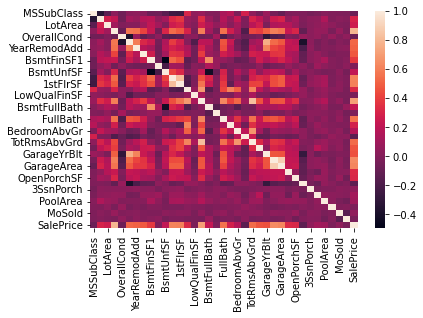

In [ ]:
cols = dataset.columns[dataset.dtypes == "float64"]
df_corr = dataset[cols].corr()
sns.heatmap(df_corr)

In [ ]:
columns = df_corr.SalePrice[df_corr.SalePrice > 0.5][:-1].index
dataset = dataset[columns]
train_X = dataset.iloc[:, :-1].values
train_y = dataset.iloc[:, -1].values

## Training the Random Forest Regression model on the whole dataset

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100)
regressor.fit(train_X, train_y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

# Predicting the x_test

In [ ]:
val_dataset = pd.read_csv('train.csv', index_col = "Id")
val_dataset = val_dataset[columns]
val_X, val_y = val_dataset.iloc[:, :-1].values, val_dataset.iloc[:, -1].values
y_test_pred = regressor.predict(val_X)

In [190]:
submission = pd.DataFrame(data = {
    "Id" : [i + len(y_test_pred) for i in range(len(y_test_pred))],
    "SalePrice":y_test_pred
    })
submission.set_index("Id")
submission.to_csv("submission.csv", index=False)

# Accurecy

In [ ]:
import sklearn.metrics as sm
print("Mean absolute error =", round(sm.mean_absolute_error(val_y, y_test_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(val_y, y_test_pred), 2)) 
print("Median absolute error =", round(sm.median_absolute_error(val_y, y_test_pred), 2)) 
print("Explain variance score =", round(sm.explained_variance_score(val_y, y_test_pred), 2)) 
print("R2 score =", round(sm.r2_score(val_y, y_test_pred), 2))

Mean absolute error = 23.99
Mean squared error = 1353.75
Median absolute error = 16.52
Explain variance score = 0.97
R2 score = 0.97
